In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Assignment I** <br/> *Predicting mood based on smartphone data*

---

In [2]:
# load data
data = pd.read_csv('data/mood_smartphone.csv')
data.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [4]:
# get unique id
print(f'Number of unique IDs: {len(data.id.unique())}')

Number of unique IDs: 27


## Data description

| Column   | Description                               |
|----------|-------------------------------------------|
| id | The user the measurement originated from. |
| time | Timestamp of measurement entry. |
| variable | The measured variable (see table below). |
| value | The measurement. |


| Variable | Type (+ scale) | Description |
|----------|--------------|-------------|
| mood | Int (between 1 to 10)  | The mood scored by the user. |
| circumplex.arousal | Int (between -2 to 2) | The arousal scored by the user. |
| circumplex.valence | Int (between -2 to 2) | The valence scored by the user |
| activity | Float (between 0 and 1) | Activity score of the user |
| screen | Float (in unit time, note: unknown unit) | Duration of screen activity |
| call | Bool | Whether a call was made |
| sms | Bool | Wheter an sms was sent |
| appCat.builtin | Float (in units time) | Duration of usage of builtin apps |
| appCat.communication | Float (in units time) | Duration of usage of communication apps |
| appCat.entertainment | Float (in units time) | Duration of usage of entertainment apps |

etc...

## **Task 1a** <br/> *Exploratory data analysis*

---

Notice all sorts of properties of the dataset: 
1. how many records are there, 
2. how many attributes, 
3. what kinds of attributes are there, 
4. ranges of values, 
5. distribution of values, 
6. relationships between attributes, 
7. missing values, 
8. and so on...

A table is often a suitable way of showing such properties of a dataset. Notice if something is interesting (to you, or in general), make sure you write it down if you find something worth mentioning.

In [132]:
# superficial summary of the data
print(f'Number of measured variables: {len(data.variable.unique())}')  # check the number of unique variables
print(f'Number of participants: {len(data.id.unique())}')  # checks the number of unique id's
print(f'Number of entries: {len(data['variable'])}')  # checks the total number of observations
print(f'Number of missing values: {data.value.isnull().sum()}')  # checks the number of missing values

Number of measured variables: 19
Number of participants: 27
Number of entries: 376912
Number of missing values: 202


### **Generic**

---

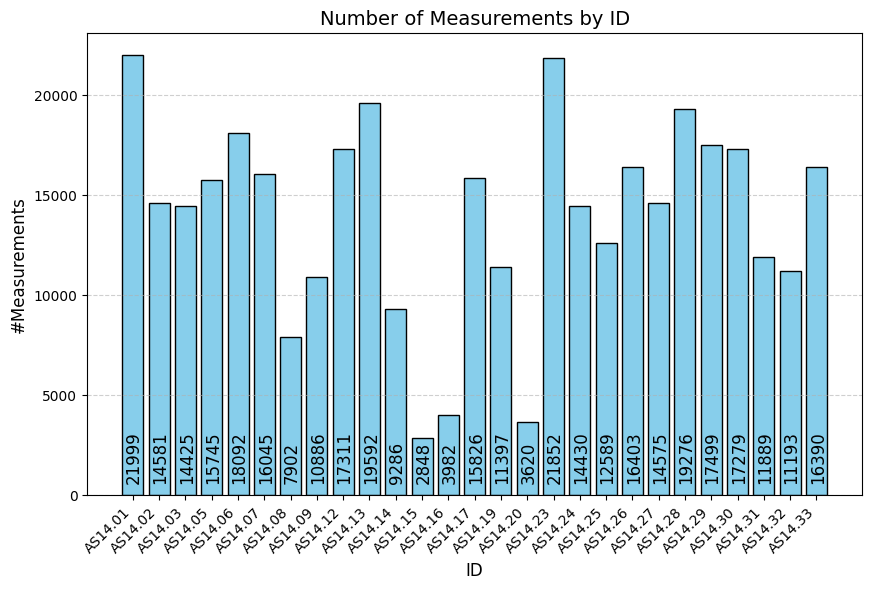

In [126]:
# plot
variable_entry_counts_by_id = data.groupby('id')['variable'].size()

plt.figure(figsize=(10, 6))
plt.title('Number of Measurements by ID', fontsize=14)
bars = plt.bar(variable_entry_counts_by_id.index, variable_entry_counts_by_id.values, color='skyblue', edgecolor='black') 

for bar, count in zip(bars, variable_entry_counts_by_id.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        750, 
        str(count), 
        rotation=90, 
        ha='center', 
        # color='white',
        fontsize=12
    )

plt.xlabel('ID', fontsize=12)
plt.ylabel('#Measurements', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
plt.show()

Categorical distribution of the variable column: 
variable
screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.valence       5643
circumplex.arousal       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64



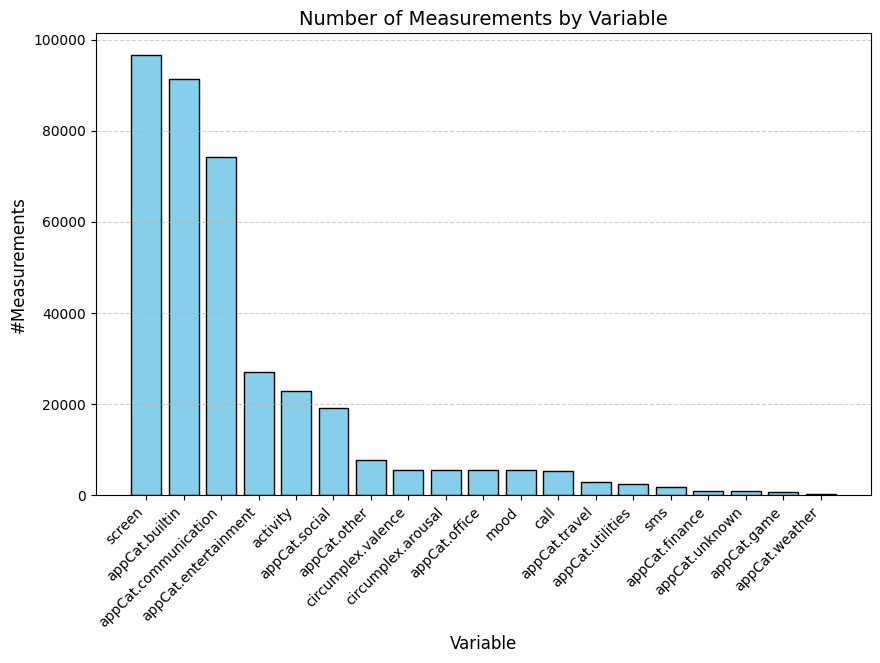

In [138]:
# entries per variable
variable_entry_counts = data['variable'].value_counts()
print(f'Categorical distribution of the variable column: \n{variable_entry_counts}\n')  # check whether the variable measurements are balanced

# plot
plt.figure(figsize=(10, 6))
plt.title('Number of Measurements by Variable', fontsize=14)
bars = plt.bar(variable_entry_counts.index, variable_entry_counts.values, color='skyblue', edgecolor='black')

# for bar, count in zip(bars, variable_entry_counts.values):
#     plt.text(
#         bar.get_x() + bar.get_width() / 2 + 0.05, 
#         750, 
#         str(count), 
#         rotation=90, 
#         ha='center', 
#         # color='white',
#         fontsize=12
#     )

plt.xlabel('Variable', fontsize=12)
plt.ylabel('#Measurements', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
plt.show()


### **Mood**

---

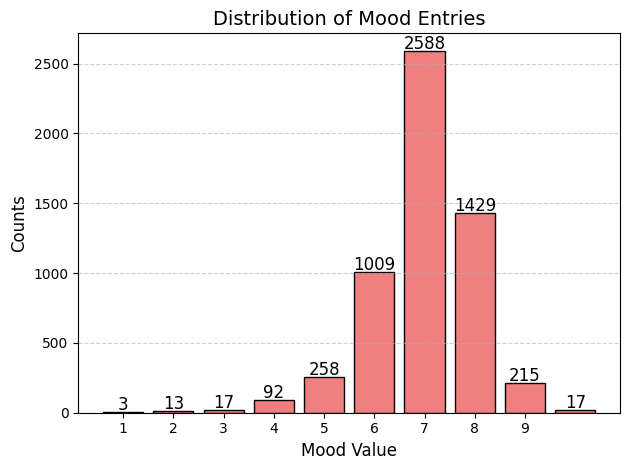

In [117]:
# mood data: summary statistics
mood_entries = data[data.variable == 'mood']

# get the frequency of each mood value
mood_value_counts = mood_entries['value'].value_counts()

bars = plt.bar(mood_value_counts.index, mood_value_counts.values, color='lightcoral', edgecolor='black')

# counts on top of bars
for bar, count in zip(bars, mood_value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 15, str(count), ha='center', fontsize=12)


# styling
plt.title('Distribution of Mood Entries', fontsize=14)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel('Mood Value', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

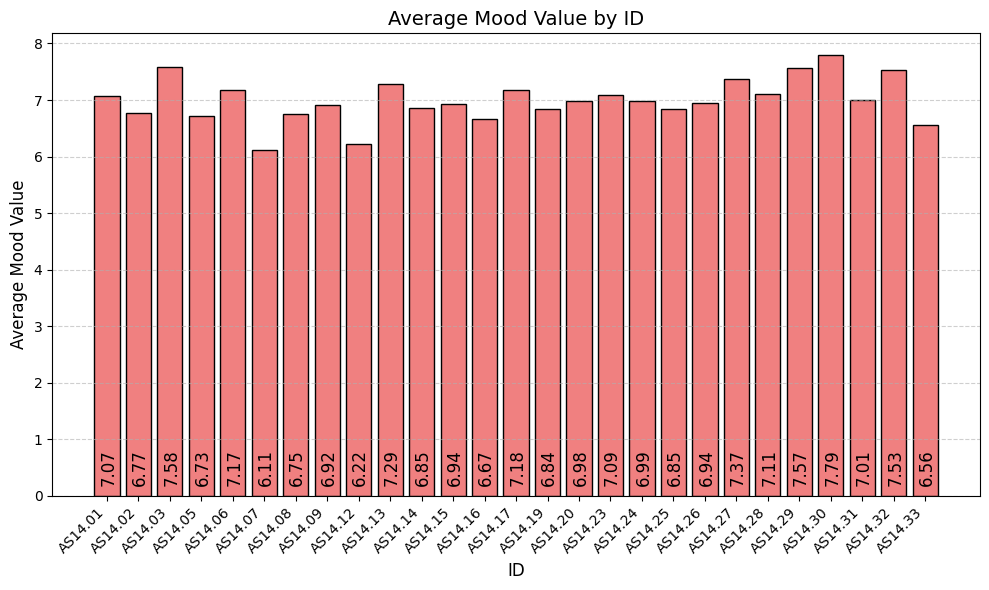

In [133]:
# get the average mood value per participant
mood_avg = mood_entries.groupby('id')['value'].mean()

plt.figure(figsize=(10, 6))
plt.title('Average Mood Value by ID', fontsize=14)
bars = plt.bar(mood_avg.index, mood_avg.values, color='lightcoral', edgecolor='black')

# counts on top of bars
for bar, count in zip(bars, mood_avg.values):
    # plt.text(bar.get_x() + bar.get_width() / 2, count + 0.1, f'{count:.2f}', ha='center', fontsize=12)
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        0.25, 
        f'{count:.2f}', 
        rotation=90, 
        ha='center', 
        fontsize=12
    )

# styling
plt.xlabel('ID', fontsize=12)
plt.ylabel('Average Mood Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **Screen Time**

---

count    96578.000000
mean        75.335206
std        253.822497
min          0.035000
25%          5.322250
50%         20.044500
75%         62.540250
max       9867.007000
Name: value, dtype: float64


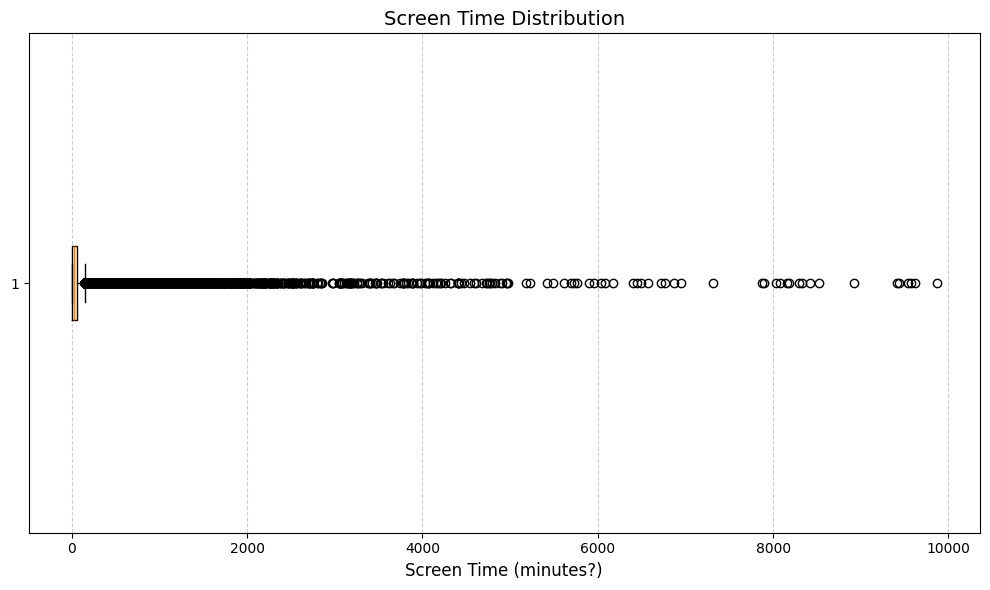

In [156]:
# screen data: summary statistics
screen_entries = data[data.variable == 'screen']

print(screen_entries['value'].describe())

# plot as a boxplot
plt.figure(figsize=(10, 6))
plt.title('Screen Time Distribution', fontsize=14)
plt.boxplot(screen_entries['value'], vert=False)
plt.xlabel('Screen Time (minutes?)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [158]:
# find entries with screen time > 24 hours, wassup with that?
screen_entries[screen_entries['value'] > 24 * 60]

# print(data[data.variable == 'screen'].value.describe())

count    96578.000000
mean        75.335206
std        253.822497
min          0.035000
25%          5.322250
50%         20.044500
75%         62.540250
max       9867.007000
Name: value, dtype: float64


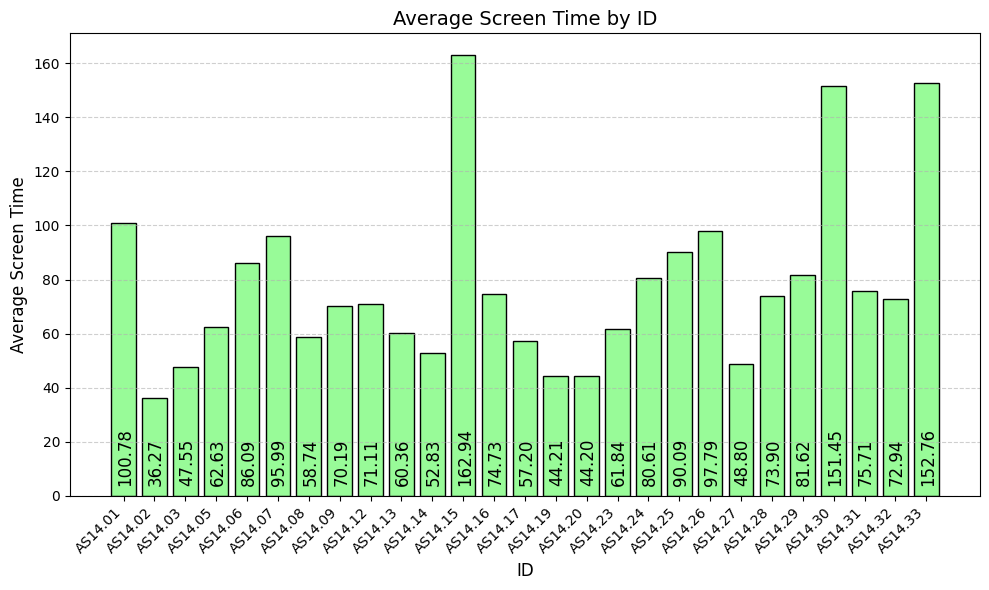

In [145]:
# get the average screen time per participant
screen_avg = screen_entries.groupby('id')['value'].mean()

plt.figure(figsize=(10, 6))
plt.title('Average Screen Time by ID', fontsize=14)
bars = plt.bar(screen_avg.index, screen_avg.values, color='palegreen', edgecolor='black')

# counts on top of bars
for bar, count in zip(bars, screen_avg.values):
    # plt.text(bar.get_x() + bar.get_width() / 2, count + 0.1, f'{count:.2f}', ha='center', fontsize=12)
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        5, 
        f'{count:.2f}', 
        rotation=90, 
        ha='center', 
        fontsize=12
    )

# styling
plt.xlabel('ID', fontsize=12)
plt.ylabel('Average Screen Time', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()